This notebook is about the Blackjack Problem, as described in Sutton's Reinforcement Learning book, 2nd edition, page 76.

We apply Monte-Carlo methods to this problem, as suggested in the book.

In [1]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.graphs import *
from baserl.monte_carlo import *
from baserl.blackjack import *

In [2]:
%matplotlib inline

In [3]:
def visualize_blackjack_v(v):
    VIEW_ELEV_ANGLE=50
    VIEW_AZIM_ANGLE=205
    # We only display for sum of player's cards > 11, to reproduce the diagram from Sutton's RL book, 2nd ed, page 77
    filtered_v = dict([k for k in v.items() if k[0][0] >= 12])
    wireframe_value_function(filtered_v,
                             mapping_key_func=lambda k: (k[0], k[1]),
                             make_default_key_func=lambda k: (k[0], k[1], True),
                             view_elev_angle=VIEW_ELEV_ANGLE,
                             view_azim_angle=VIEW_AZIM_ANGLE,
                             title="Usable ace")

    wireframe_value_function(filtered_v,
                             mapping_key_func=lambda k: (k[0], k[1]),
                             make_default_key_func=lambda k: (k[0], k[1], False),
                             view_elev_angle=VIEW_ELEV_ANGLE,
                             view_azim_angle=VIEW_AZIM_ANGLE,
                             title="No usable ace")

In [4]:
# We start with a very simple policy, which is for the player to stick if the sum is >= 20, and hit otherwise.
mdp = Blackjack()
simple_policy = mdp.make_simple_blackjack_player_policy()

In [5]:
# First-visit for Value Function evaluation for a given policy.
# Run with 500K episodes
start_time = time.time()
# We save all intermediate versions of the value function, to plot the state during early stages and in the end.
v_history = []
v = monte_carlo_policy_evaluation(every_visit=False,
                                  policy=simple_policy,
                                  gamma=mdp.gamma(),
                                  episode_generator= BlackjackEpisodeGenerator(with_exploring_starts=False),
                                  num_episodes=500000,
                                  verbose=False,
                                  v_history=v_history,
                                 v_history_snapshots=set([1000, 10000]))
print("Done in time:", time.time() - start_time)

Done in time: 10.737372636795044


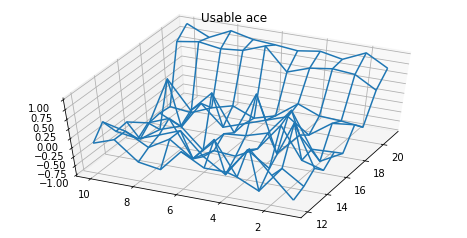

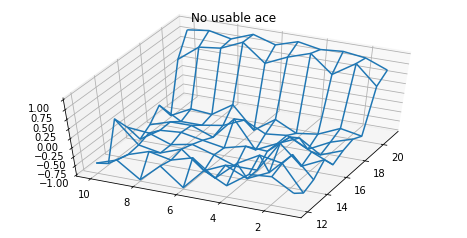

In [6]:
# After 1000 episodes
visualize_blackjack_v(v_history[0])

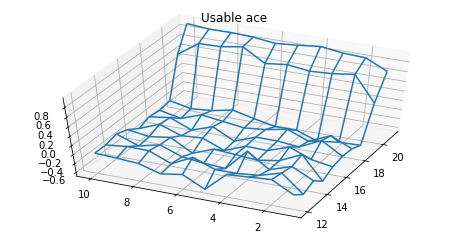

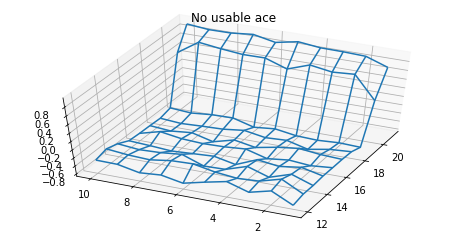

In [7]:
# After 10K episodes
visualize_blackjack_v(v_history[1])

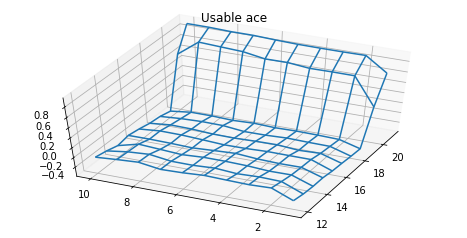

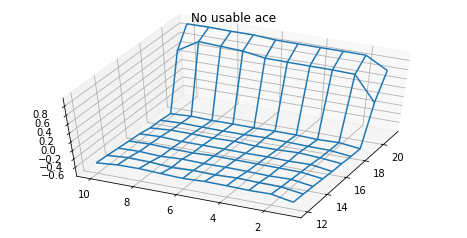

In [8]:
# Final version
visualize_blackjack_v(v)

In [9]:
# So far we have evaluated a Value Function for a fixed, simple policy.
# Next we will apply Monte-Carlo control algorithms, to generate a better policy. This time, we will use Q state-action values.

In [10]:
# First we use Exploring-Starts as described on page 81 of Sutton's RL book, 2nd edition.
# This requires an initial policy, and we choose the simple policy described above. We could have also started with a random
# initial policy.
initial_policy = simple_policy

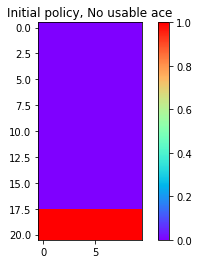

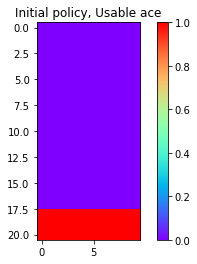

In [11]:
# Let's first visualize the simple initial policy

# No usable ace
heatmap_policy(initial_policy, 
               title="Initial policy, No usable ace",
               default_action_if_missing=-1,
               mapping_key_func=lambda k: (k[0], k[1]),
               inv_mapping_key_func=lambda k: (k[0], k[1], False))

# With usable ace
heatmap_policy(initial_policy, 
               title="Initial policy, Usable ace",
               default_action_if_missing=-1,
               mapping_key_func=lambda k: (k[0], k[1]),
               inv_mapping_key_func=lambda k: (k[0], k[1], True))

In [12]:
start_time = time.time()
final_policy, q = on_policy_monte_carlo_control(
    initial_policy=initial_policy,
    gamma=mdp.gamma(), 
    episode_generator=BlackjackEpisodeGenerator(with_exploring_starts=True),
    num_episodes=10000000,
    epsilon=0)
print("Done in time:", time.time() - start_time)

Done in time: 236.21490216255188


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


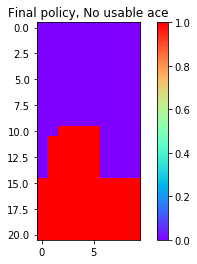

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


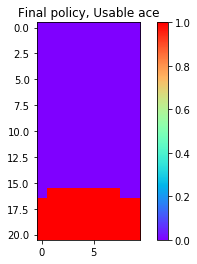

In [13]:
# No usable ace
heatmap_policy(final_policy, 
               print_format="%3.1f",
               title="Final policy, No usable ace",
               default_action_if_missing=-1,
               mapping_key_func=lambda k: (k[0], k[1]),
               inv_mapping_key_func=lambda k: (k[0], k[1], False))

# With usable ace
heatmap_policy(final_policy, 
               print_format="%3.1f",
               title="Final policy, Usable ace",
               default_action_if_missing=-1,
               mapping_key_func=lambda k: (k[0], k[1]),
               inv_mapping_key_func=lambda k: (k[0], k[1], True))

In [14]:
# Next we use On Policy First Visit MC Control with Epsilon-Soft Policies as described on page 83 of Sutton's RL book,
# 2nd edition.
# This is more generically useful since it does not rely on the strong/non-realistic "Exploring Starts" assumption.

# For the initial policy we choose again the simple policy described above. We could have also started with a random
# initial policy.
initial_policy = mdp.make_simple_blackjack_player_policy() 
generic_episode_generator = BlackjackEpisodeGenerator(with_exploring_starts=False)
start_time = time.time()
final_policy, q = on_policy_monte_carlo_control(
    initial_policy=initial_policy,
    gamma=mdp.gamma(), 
    episode_generator=generic_episode_generator,
    num_episodes=10000000,
    epsilon=0.1)
print("Done in time:", time.time() - start_time)

Done in time: 272.7485091686249


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


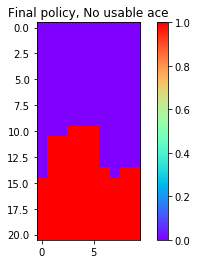

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


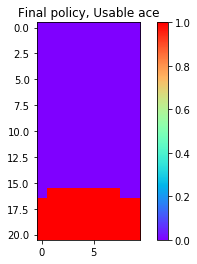

In [15]:
# No usable ace
heatmap_policy(final_policy, 
               print_format="%3.1f",
               title="Final policy, No usable ace",
               default_action_if_missing=-1,
               mapping_key_func=lambda k: (k[0], k[1]),
               inv_mapping_key_func=lambda k: (k[0], k[1], False))

# With usable ace
heatmap_policy(final_policy, 
               print_format="%3.1f",
               title="Final policy, Usable ace",
               default_action_if_missing=-1,
               mapping_key_func=lambda k: (k[0], k[1]),
               inv_mapping_key_func=lambda k: (k[0], k[1], True))

In [16]:
# Some visualizations next to get some ideas about the visits to different states, and the learned Q-function

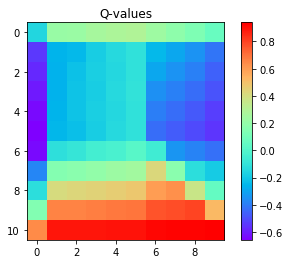

In [17]:
# Values for non usable ace
heatmap_q_value(q, missing_value=-1, mapping_key_func=lambda k: (k[0], k[1]),
                inv_mapping_key_func=lambda k: (k[0], k[1], False), mapping_value_func=lambda k: 1.0 * k[0] / k[1])

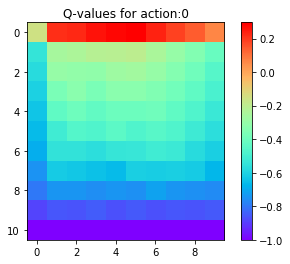

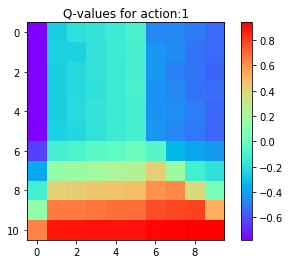

In [18]:
for action in BJ_HIT, BJ_STICK:
    heatmap_q_value_for_action(q, action, missing_value=-1, mapping_key_func=lambda k: (k[0], k[1]),
                inv_mapping_key_func=lambda k: (k[0], k[1], False), mapping_value_func=lambda k: 1.0 * k[0] / k[1],
                title="Q-values for action:%s" % action)

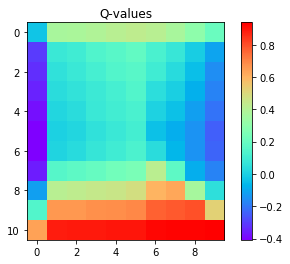

In [19]:
# Values for usable ace
heatmap_q_value(q, missing_value=-1, mapping_key_func=lambda k: (k[0], k[1]),
                inv_mapping_key_func=lambda k: (k[0], k[1], True), mapping_value_func=lambda k: 1.0 * k[0] / k[1])

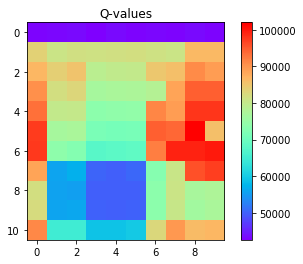

In [20]:
# Visits
heatmap_q_value(q, missing_value=0, mapping_key_func=lambda k: (k[0], k[1]),
                inv_mapping_key_func=lambda k: (k[0], k[1], False), mapping_value_func=lambda k: k[1])